In [1]:
# Imports
import glob
import pandas as pd
import re
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Global Variables
data_path = '../data/raw/'
substrings_to_remove = [data_path.replace('raw/', 'raw'), '\\', 'RefBldg', '.csv']

# Functions
def get_building_type(filename):
    return re.sub(r'New2004.+', '', filename)

def get_location(filename):
    return re.sub(r'^.*USA_', '', filename)

def get_all_csv_filenames(path):
    return glob.glob(path + "*.csv")

def build_dataframe(filenames):
    building_energy_profiles_list = []
    for filepath in filenames:
        df = pd.read_csv(filepath)
        df['building_type'] = get_building_type(clean_filename(filepath))
        df['location'] = get_location(clean_filename(filepath))
        building_energy_profiles_list.append(df)
    df = pd.DataFrame()
    df = pd.concat(building_energy_profiles_list)
    return df

def clean_filename(filename):
    for substring_to_remove in substrings_to_remove:
        filename = filename.replace(substring_to_remove, '')
    return filename

In [88]:
energy_profiles_df = build_dataframe(get_all_csv_filenames(data_path))
energy_profiles_df.info()
display(energy_profiles_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280320 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Date/Time                                   280320 non-null  object 
 1   Electricity:Facility [kW](Hourly)           280320 non-null  float64
 2   Fans:Electricity [kW](Hourly)               280320 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            280320 non-null  float64
 4   Heating:Electricity [kW](Hourly)            280320 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     280320 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  280320 non-null  float64
 7   Gas:Facility [kW](Hourly)                   280320 non-null  float64
 8   Heating:Gas [kW](Hourly)                    280320 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          157680 non-null  float64
 10

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [89]:
energy_profiles_df.rename(columns={'Electricity:Facility [kW](Hourly)': 'Electric_Facility', 'Gas:Facility [kW](Hourly)': 'Gas_Facility'}, inplace=True)

energy_profiles_df

,Date/Time,Electric_Facility,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas_Facility,Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location,Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8756,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8757,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN
8758,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE,NaN,NaN


In [90]:
energy_profiles_df.reset_index(drop=True, inplace=True)

energy_profiles_df = energy_profiles_df.drop(columns=['Electricity:Facility [kW](Monthly)','Gas:Facility [kW](Monthly)'])

energy_profiles_df

,Date/Time,Electric_Facility,Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas_Facility,Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),building_type,location
0,01/01 01:00:00,22.545838,4.001302,0.0,0.0,4.589925,8.1892,61.536209,51.846230,3.33988,6.350099,FullServiceRestaurant,GA_ATLANTA
1,01/01 02:00:00,14.745113,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
2,01/01 03:00:00,14.760728,0.000000,0.0,0.0,1.529975,7.4902,3.931953,0.000000,3.33988,0.592073,FullServiceRestaurant,GA_ATLANTA
3,01/01 04:00:00,14.766270,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,GA_ATLANTA
4,01/01 05:00:00,14.918930,0.000000,0.0,0.0,1.529975,7.4902,3.931959,0.000000,3.33988,0.592079,FullServiceRestaurant,GA_ATLANTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,3.095889,0.0,0.0,5.481225,1.0116,60.633698,60.633698,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280316,12/31 21:00:00,19.655896,4.240071,0.0,0.0,5.481225,1.0116,82.036381,82.036381,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280317,12/31 22:00:00,19.063661,3.647837,0.0,0.0,5.481225,1.0116,70.727347,70.727347,NaN,NaN,Warehouse,IL_CHICAGO-OHARE
280318,12/31 23:00:00,20.442228,5.026403,0.0,0.0,5.481225,1.0116,98.965980,98.965980,NaN,NaN,Warehouse,IL_CHICAGO-OHARE


In [91]:
profiles_df = energy_profiles_df.drop(columns=['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)','Heating:Electricity [kW](Hourly)'
                                              ,'InteriorLights:Electricity [kW](Hourly)','InteriorEquipment:Electricity [kW](Hourly)'
                                              ,'Heating:Gas [kW](Hourly)','InteriorEquipment:Gas [kW](Hourly)','Water Heater:WaterSystems:Gas [kW](Hourly)'
                                              ])


profiles_df[['dayt', 'time']] = profiles_df['Date/Time'].str.split('  ', expand=True)
profiles_df[['month', 'day']] = profiles_df['dayt'].str.split('/', expand=True)
profiles_df = profiles_df.drop(columns=['dayt'])

In [92]:
from sklearn.preprocessing import LabelEncoder

profiles_df['Conv_building_type']= LabelEncoder().fit_transform(profiles_df['building_type'].values) 

profiles_df['Conv_location']= LabelEncoder().fit_transform(profiles_df['location'].values) 


profiles_df

,Date/Time,Electric_Facility,Gas_Facility,building_type,location,time,month,day,Conv_building_type,Conv_location
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA,01:00:00,01,01,0,0
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA,02:00:00,01,01,0,0
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA,03:00:00,01,01,0,0
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA,04:00:00,01,01,0,0
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA,05:00:00,01,01,0,0
...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,60.633698,Warehouse,IL_CHICAGO-OHARE,20:00:00,12,31,15,1
280316,12/31 21:00:00,19.655896,82.036381,Warehouse,IL_CHICAGO-OHARE,21:00:00,12,31,15,1
280317,12/31 22:00:00,19.063661,70.727347,Warehouse,IL_CHICAGO-OHARE,22:00:00,12,31,15,1
280318,12/31 23:00:00,20.442228,98.965980,Warehouse,IL_CHICAGO-OHARE,23:00:00,12,31,15,1


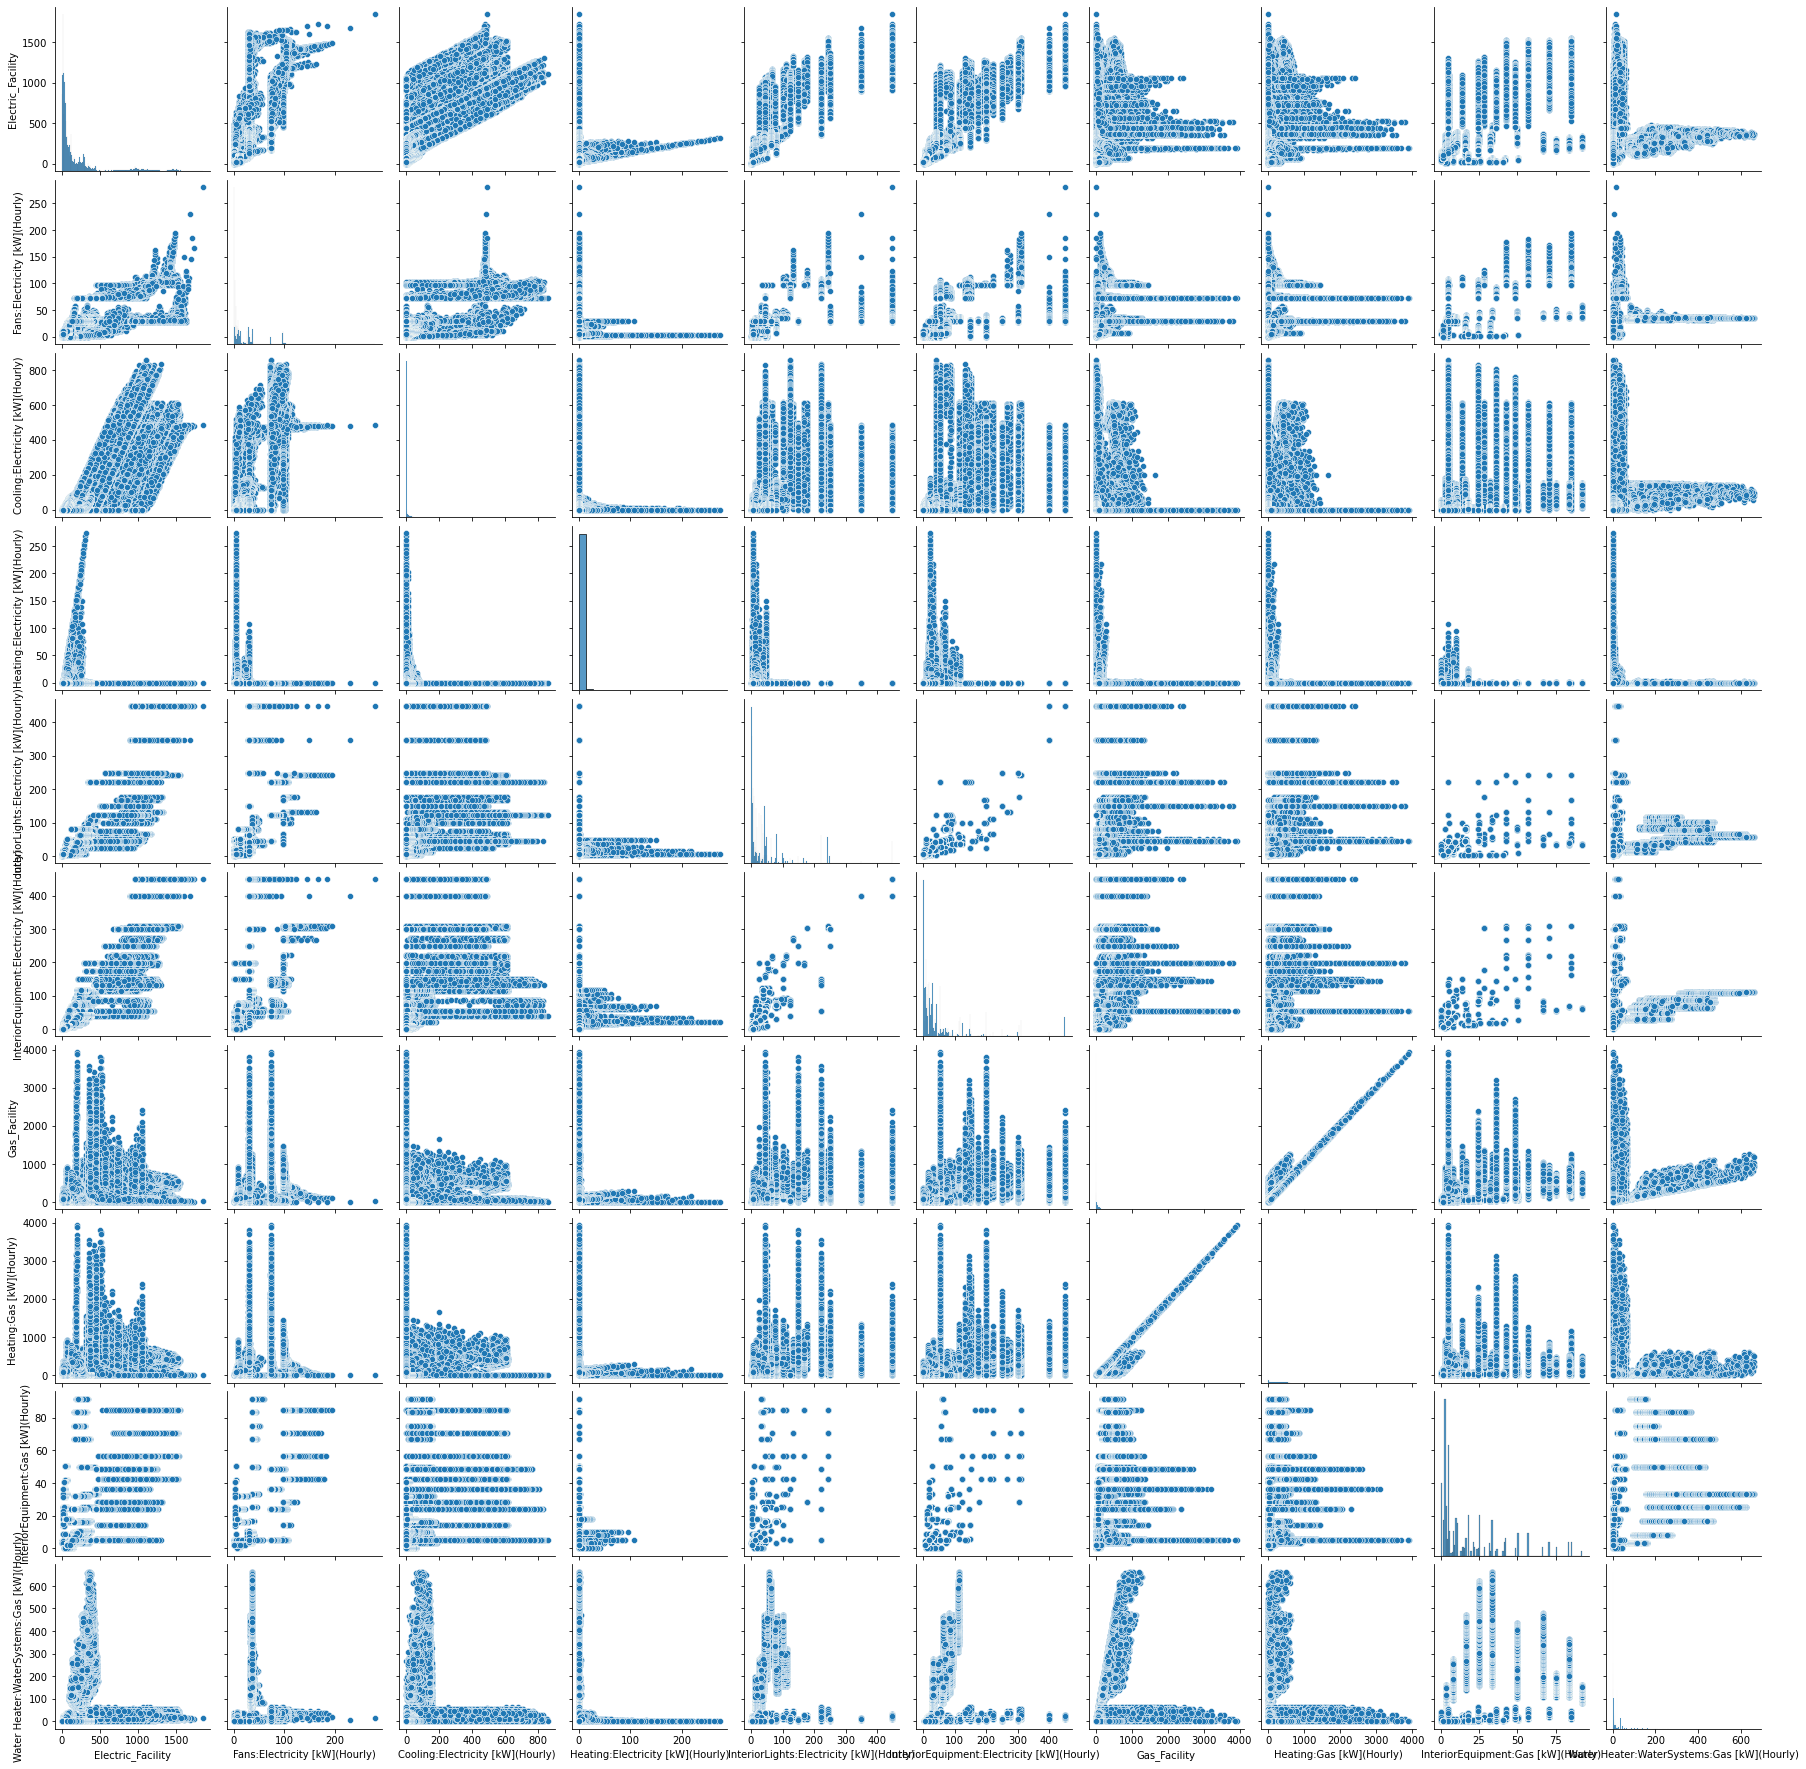

In [93]:
sns.pairplot(energy_profiles_df)
plt.show()

<AxesSubplot:>

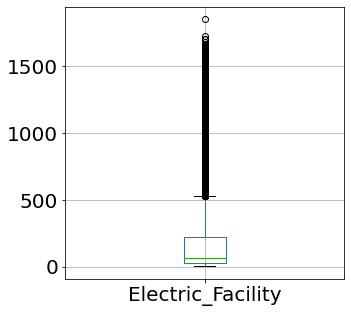

In [8]:
profiles_df.boxplot('Electric_Facility', figsize=(5,5), fontsize= 20)

<AxesSubplot:>

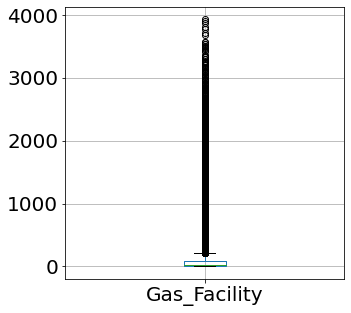

In [9]:
profiles_df.boxplot('Gas_Facility', figsize=(5,5), fontsize= 20)

In [162]:
df = df.drop(columns=['datetime'])

df

,Date/Time,Electric_Facility,Gas_Facility,building_type,location,time,month,day,Conv_building_type,Conv_location,year
0,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA,01:00:00,1.0,1.0,0.0,0.0,2012
1,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA,02:00:00,1.0,1.0,0.0,0.0,2012
2,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA,03:00:00,1.0,1.0,0.0,0.0,2012
3,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA,04:00:00,1.0,1.0,0.0,0.0,2012
4,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA,05:00:00,1.0,1.0,0.0,0.0,2012
...,...,...,...,...,...,...,...,...,...,...,...
280315,12/31 20:00:00,18.511713,60.633698,Warehouse,IL_CHICAGO-OHARE,20:00:00,12.0,31.0,15.0,1.0,2012
280316,12/31 21:00:00,19.655896,82.036381,Warehouse,IL_CHICAGO-OHARE,21:00:00,12.0,31.0,15.0,1.0,2012
280317,12/31 22:00:00,19.063661,70.727347,Warehouse,IL_CHICAGO-OHARE,22:00:00,12.0,31.0,15.0,1.0,2012
280318,12/31 23:00:00,20.442228,98.965980,Warehouse,IL_CHICAGO-OHARE,23:00:00,12.0,31.0,15.0,1.0,2012


In [166]:
#profiles_df['year'] = 2012
df = profiles_df


df['datetime'] = pd.to_datetime(df[['year','month','day']])
df.index = pd.to_datetime(df['datetime'])
df.head()

,Date/Time,Electric_Facility,Gas_Facility,building_type,location,time,month,day,Conv_building_type,Conv_location,year,datetime
datetime,,,,,,,,,,,,
2012-01-01,01/01 01:00:00,22.545838,61.536209,FullServiceRestaurant,GA_ATLANTA,01:00:00,1.0,1.0,0.0,0.0,2012,2012-01-01
2012-01-01,01/01 02:00:00,14.745113,3.359880,FullServiceRestaurant,GA_ATLANTA,02:00:00,1.0,1.0,0.0,0.0,2012,2012-01-01
2012-01-01,01/01 03:00:00,14.760728,3.931953,FullServiceRestaurant,GA_ATLANTA,03:00:00,1.0,1.0,0.0,0.0,2012,2012-01-01
2012-01-01,01/01 04:00:00,14.766270,3.359880,FullServiceRestaurant,GA_ATLANTA,04:00:00,1.0,1.0,0.0,0.0,2012,2012-01-01
2012-01-01,01/01 05:00:00,14.918930,3.931959,FullServiceRestaurant,GA_ATLANTA,05:00:00,1.0,1.0,0.0,0.0,2012,2012-01-01


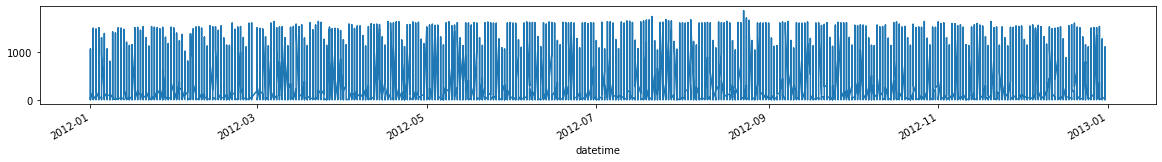

In [167]:
df.Electric_Facility.plot(figsize=(20,2));


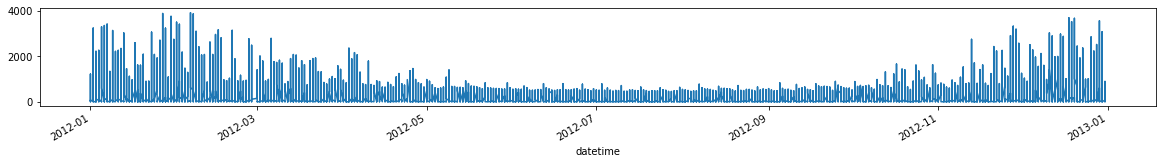

In [168]:
df.Gas_Facility.plot(figsize=(20,2));

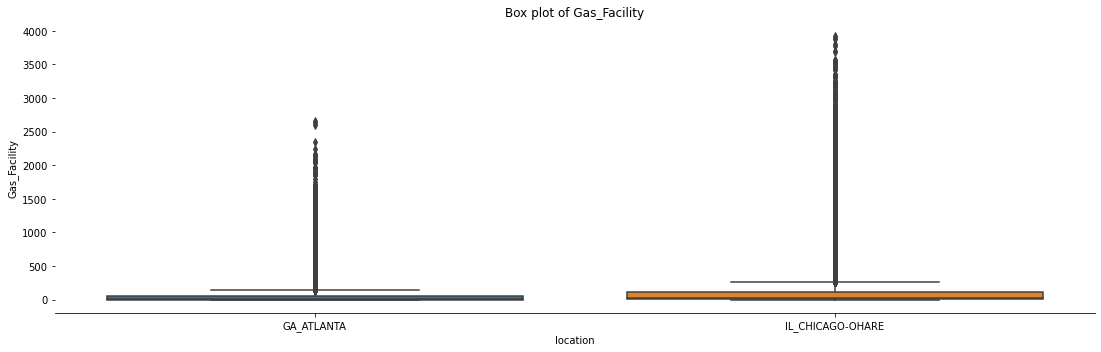

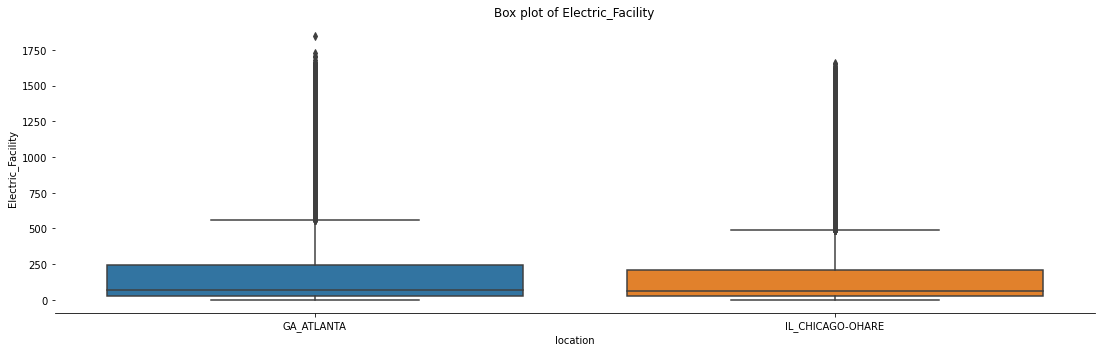

In [12]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='location', y='Gas_Facility', data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Gas_Facility')
sns.despine(left=True)
plt.tight_layout()



#Box Plot of Electricity:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x="location", y="Electric_Facility", data=profiles_df)
plt.xlabel('location')
plt.title('Box plot of Electric_Facility')
sns.despine(left=True)
plt.tight_layout()

Looks like  in consumption of gas, chicago has the higher percentage use while in Electricity, Atlanta use more

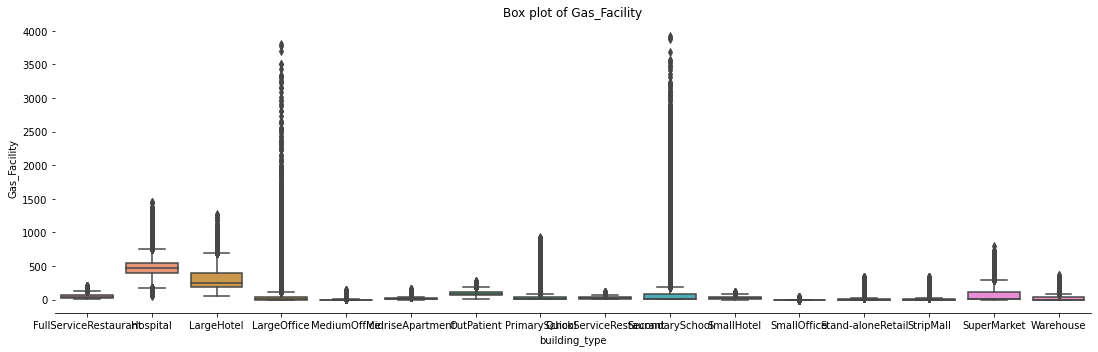

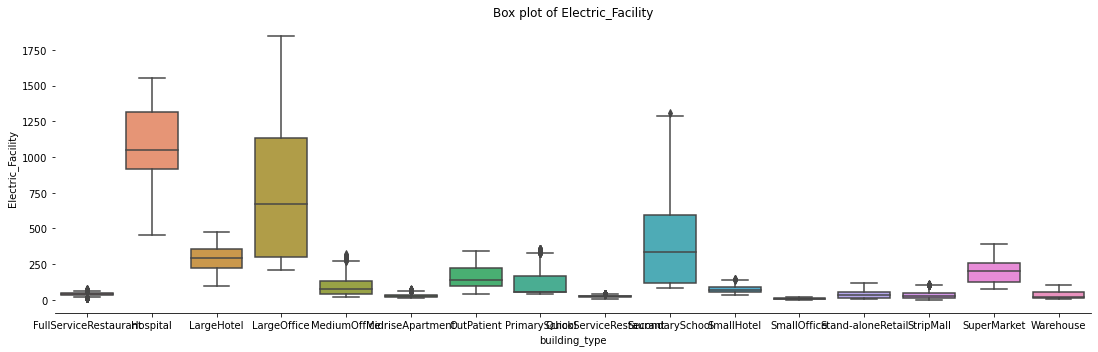

In [13]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='building_type', y='Gas_Facility', data=profiles_df)
plt.xlabel('building_type')
plt.title('Box plot of Gas_Facility')
sns.despine(left=True)
plt.tight_layout()



#Box Plot of Electricity:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x="building_type", y="Electric_Facility", data=profiles_df)
plt.xlabel('building_type')
plt.title('Box plot of Electric_Facility')
sns.despine(left=True)
plt.tight_layout()

Text(0.5, 1.0, 'Mean Electric_Facility by building_type')

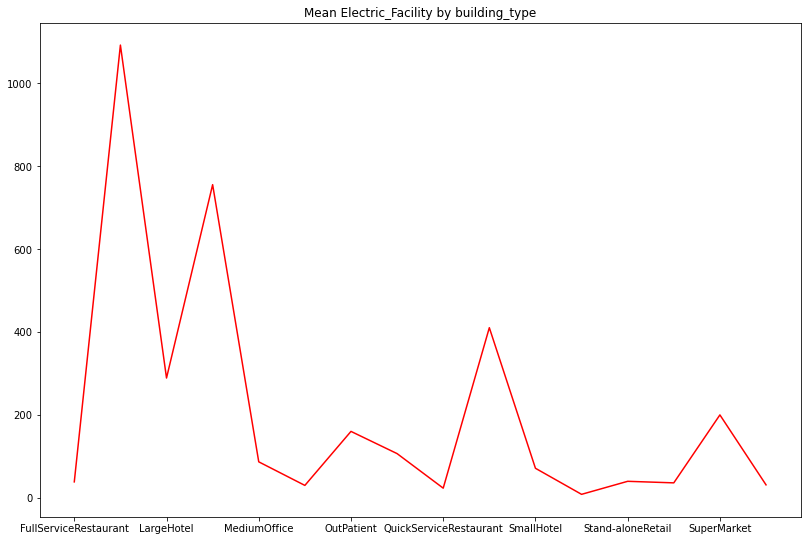

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by building_type')


Text(0.5, 1.0, 'Mean Gas_Facility by building_type')

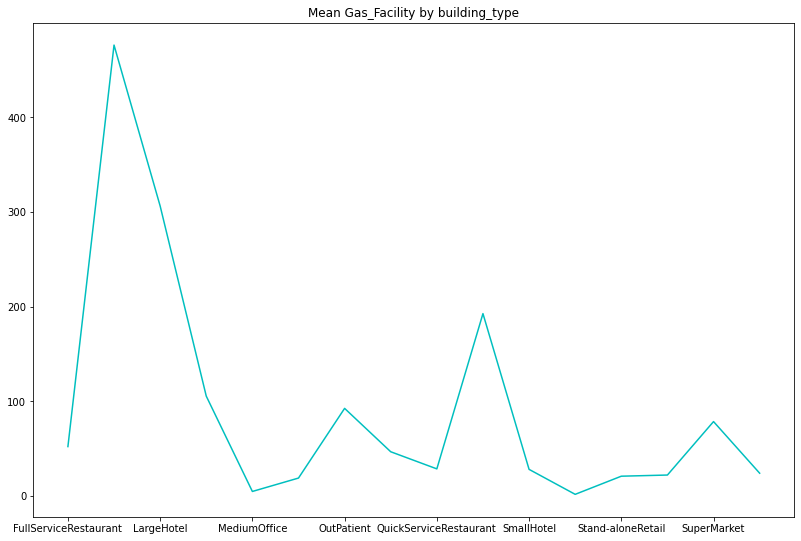

In [15]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('building_type').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by building_type')

Text(0.5, 1.0, 'Mean Electric_Facility by month')

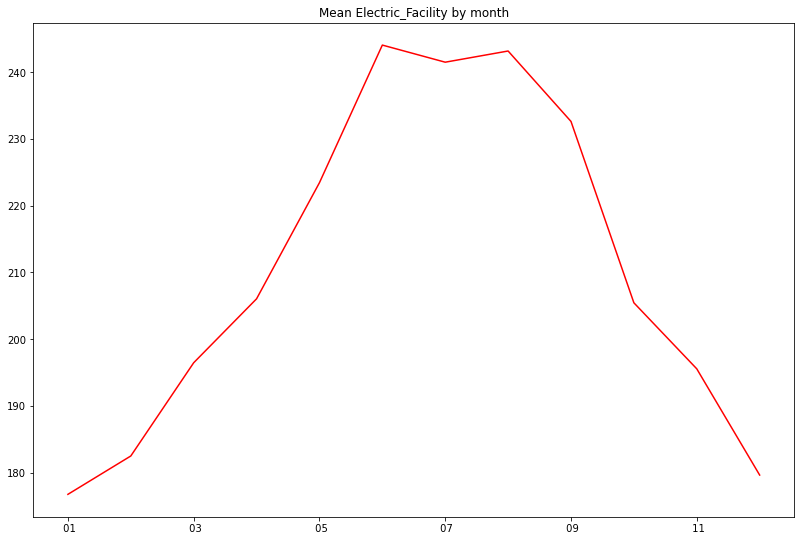

In [17]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by month')

Text(0.5, 1.0, 'Mean Electric_Facility by day')

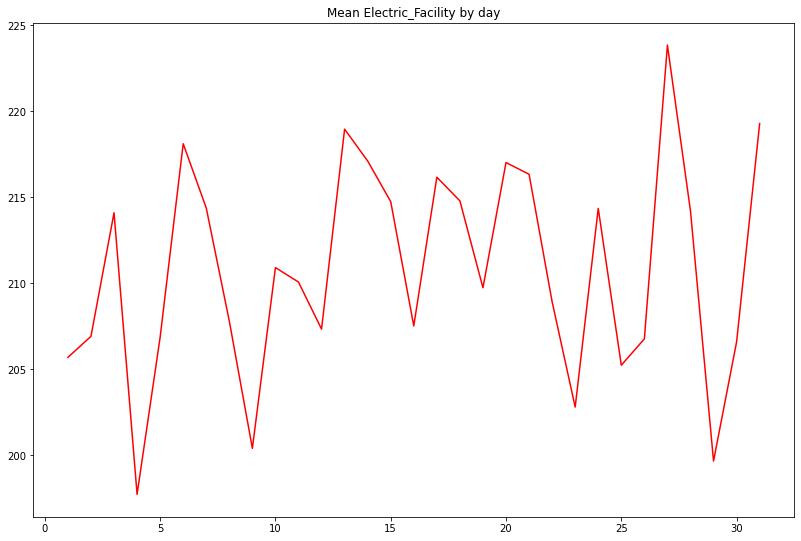

In [169]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('day').Electric_Facility.agg('mean').plot(color='r')
plt.xlabel('')
plt.title('Mean Electric_Facility by day')

Text(0.5, 1.0, 'Mean Gas_Facility by day')

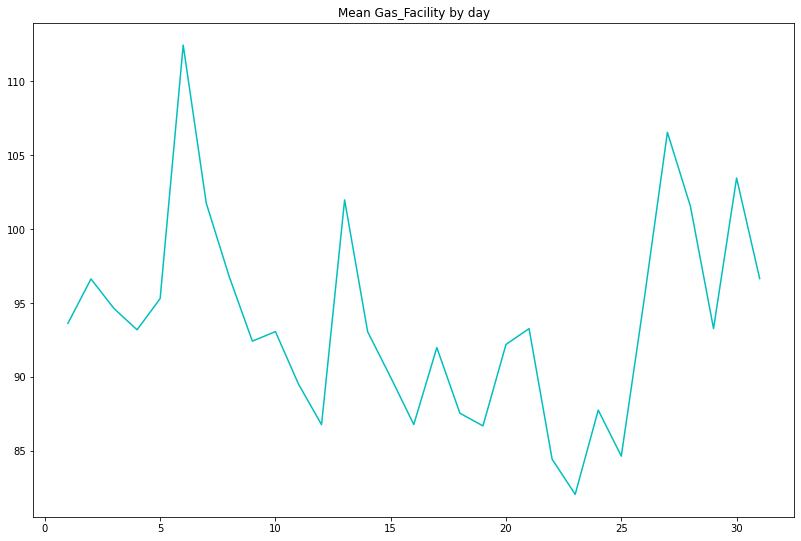

In [170]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('day').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by day')

the graph indicates that higest electricity consumption is between month May and August which implies 
 more electricity useage during summer

Text(0.5, 1.0, 'Mean Gas_Facility by month')

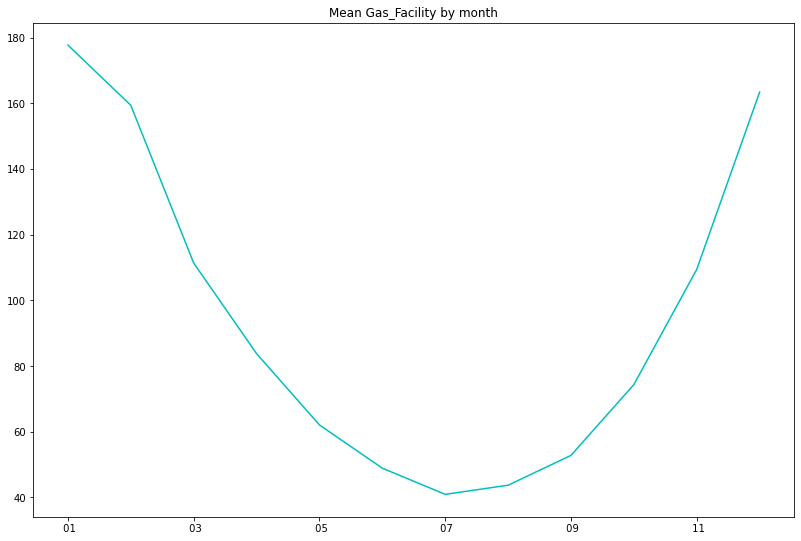

In [18]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
profiles_df.groupby('month').Gas_Facility.agg('mean').plot(color='c')
plt.xlabel('')
plt.title('Mean Gas_Facility by month')

While gas consumption is lower during summer 

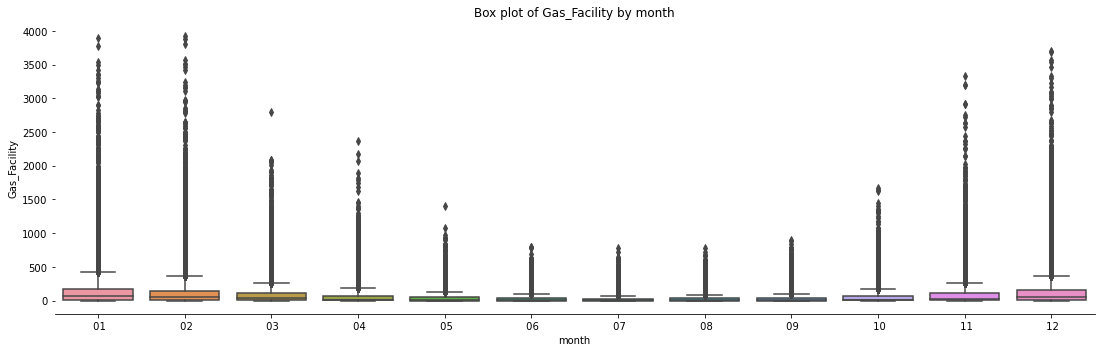

In [19]:
%matplotlib inline


#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Gas_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Gas_Facility by month')
sns.despine(left=True)
plt.tight_layout()

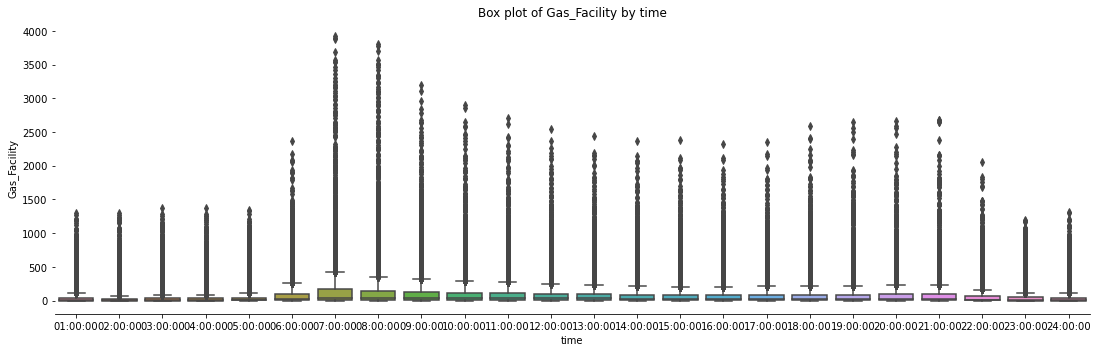

In [20]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Gas_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Gas_Facility by time')
sns.despine(left=True)
plt.tight_layout()

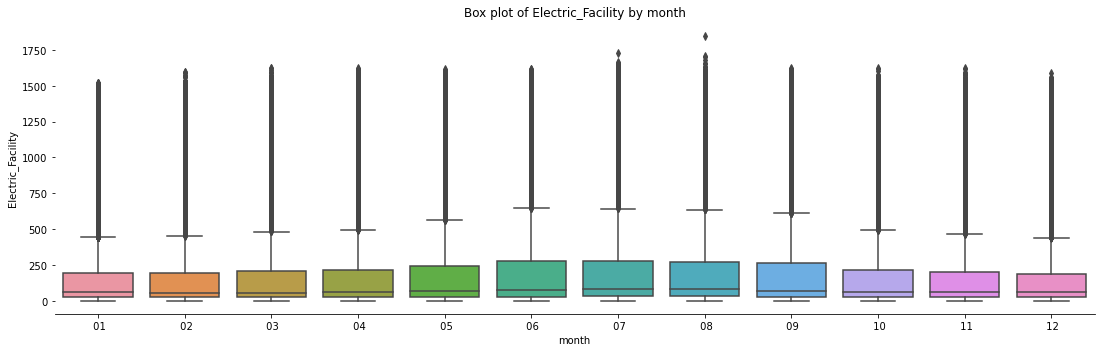

In [21]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='month', y='Electric_Facility', data=profiles_df)
plt.xlabel('month')
plt.title('Box plot of Electric_Facility by month')
sns.despine(left=True)
plt.tight_layout()

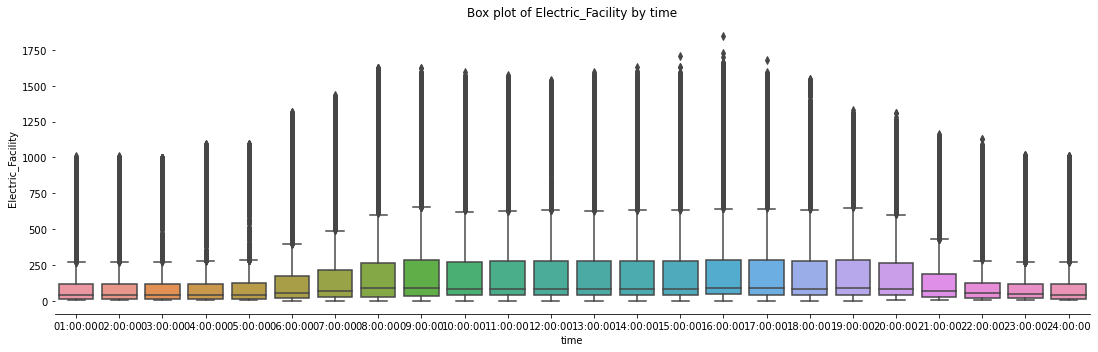

In [22]:
#Box Plot of Gas:Facility [kW](Hourly)
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6)
sns.boxplot(x='time', y='Electric_Facility', data=profiles_df)
plt.xlabel('time')
plt.title('Box plot of Electric_Facility by time')
sns.despine(left=True)
plt.tight_layout()

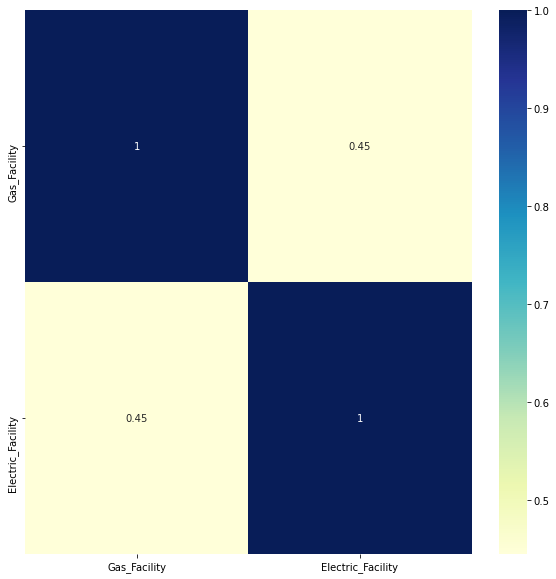

In [23]:
p = profiles_df[['Gas_Facility','Electric_Facility']]
corr_matrix = p.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [100]:
profiles_df['Conv_building_type'] = profiles_df.Conv_building_type.astype(float)
profiles_df['Conv_location'] = profiles_df.Conv_location.astype(float)
profiles_df['month'] = profiles_df.month.astype(float)
profiles_df['day'] = profiles_df.day.astype(float)


profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date/Time           280320 non-null  object 
 1   Electric_Facility   280320 non-null  float64
 2   Gas_Facility        280320 non-null  float64
 3   building_type       280320 non-null  object 
 4   location            280320 non-null  object 
 5   time                280320 non-null  object 
 6   month               280320 non-null  float64
 7   day                 280320 non-null  float64
 8   Conv_building_type  280320 non-null  float64
 9   Conv_location       280320 non-null  float64
dtypes: float64(6), object(4)
memory usage: 21.4+ MB


In [149]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Extract the target and Features from the DataFrame
#X = profiles_df[['day','month','Conv_location','Conv_building_type']]
#y = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']

X = profiles_df['day'] + profiles_df['month'] + profiles_df['Conv_location'] + profiles_df['Conv_building_type']
y = profiles_df['Electric_Facility'] + profiles_df['Gas_Facility']


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3) # 70% training and 30% test

X_train_shaped = X_train.values.reshape(-1, 1)
X_test_shaped = X_test.values.reshape(-1, 1)

In [150]:
from sklearn.ensemble import RandomForestRegressor

#Create a Rainforest Refressor
clf=RandomForestRegressor(random_state=1, max_depth=15, n_estimators=200, n_jobs=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_shaped,y_train)

y_pred=clf.predict(X_test_shaped)

In [138]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.827532164706803


In [152]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(84096,)
(84096,)
(84096,)


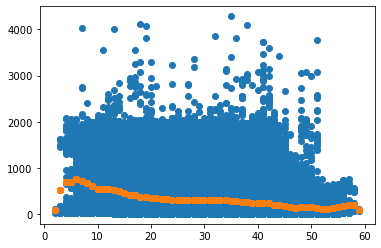

In [151]:
plt.scatter(x=X_test_shaped,y=y_test)
plt.scatter(x=X_test_shaped,y=y_pred)

In [153]:
lr = LinearRegression()
lr.fit(X_train_shaped,y_train)
predictions = lr.predict(X_test_shaped)

In [154]:
from sklearn import metrics
import numpy as np

rmse = np.sqrt(metrics.mean_squared_error(predictions, y_test))
print("Root mean squared error is {:.4f}".format(rmse))


r2= metrics.r2_score(y_test, predictions)
print(r2)

Root mean squared error is 453.8584
0.03748070789569935


In [174]:
from sklearn import tree

tr_rgr = tree.DecisionTreeRegressor(random_state = 12, max_depth = 2)

tr_rgr.fit(X_train_shaped, y_train)
ypred = tr_rgr.predict(X_test_shaped)
acc = tr_rgr.score(X_test_shaped, y_test)

print("The score on the test set {}".format(acc))

The score on the test set 0.03748983624160951
